In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import seaborn as sns
#import statsmodels.api as sm
import tkinter as tk
from tkinter import ttk
from datetime import date, time, datetime, timedelta

from IPython.display import clear_output

In [2]:
laptop = 'home'

if laptop == 'home':
    growth_data_path = "C:/Users/tmccl/OneDrive/Documents/Allpress/Growth Model/growth_db.csv"
    weather_data_path = "C:/Users/tmccl/OneDrive/Documents/Allpress/Growth Model/weather_db.csv"
    field_data_path = "C:/Users/tmccl/OneDrive/Documents/Allpress/Growth Model/field_db.csv"
    
if laptop == 'work':
    growth_data_path = "F:\\Farm Data\Growth Model\growth_db.csv"
    weather_data_path = "F:\\Farm Data\Growth Model\weather_db.csv"
    field_data_path = "F:\\Farm Data\Growth Model\\field_db.csv"
    
growth_data = pd.read_csv(growth_data_path)
weather_data = pd.read_csv(weather_data_path)
field_data = pd.read_csv(field_data_path)
test_2 = 'test_2'

In [3]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%Y')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M:%S')
weather_data['day'] = weather_data.date.dt.day
weather_data['month'] = weather_data.date.dt.month
weather_data['day_month'] = weather_data['day'].astype(str) + " - " + weather_data['month'].astype(str)

min_grow_temp = 5

weather_data['heat_units'] = weather_data['avg_temp'] - min_grow_temp
weather_data['heat_units'] = np.where((weather_data['heat_units'] < 0), 0, weather_data['heat_units']/24)

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61512 entries, 0 to 61511
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61512 non-null  datetime64[ns]
 1   time             61512 non-null  datetime64[ns]
 2   avg_temp         61512 non-null  float64       
 3   rh               61512 non-null  float64       
 4   rain             61512 non-null  float64       
 5   solar_radiation  61512 non-null  int64         
 6   wind_speed       60962 non-null  float64       
 7   bat_volt         60962 non-null  float64       
 8   leaf_wet         60962 non-null  float64       
 9   dew_point        60962 non-null  float64       
 10  day              61512 non-null  int64         
 11  month            61512 non-null  int64         
 12  day_month        61512 non-null  object        
 13  heat_units       61512 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int6

In [5]:
weather_data.head()

,date,time,avg_temp,rh,rain,solar_radiation,wind_speed,bat_volt,leaf_wet,dew_point,day,month,day_month,heat_units
0,2014-05-14,1900-01-01 14:00:00,16.2,55.9,0.0,205,2.7,6904.0,0.0,7.2,14,5,14 - 5,0.466667
1,2014-05-14,1900-01-01 15:00:00,17.4,51.2,0.0,544,2.2,6952.0,0.0,7.0,14,5,14 - 5,0.516667
2,2014-05-14,1900-01-01 16:00:00,17.7,48.9,0.0,387,2.1,6922.0,0.0,6.6,14,5,14 - 5,0.529167
3,2014-05-14,1900-01-01 17:00:00,17.9,48.9,0.0,274,2.0,6904.0,0.0,6.7,14,5,14 - 5,0.537500
4,2014-05-14,1900-01-01 18:00:00,17.2,51.0,0.0,104,1.7,6894.0,0.0,6.7,14,5,14 - 5,0.508333


In [6]:
growth_data['sample_date'] = pd.to_datetime(growth_data['sample_date'], format='%d/%m/%Y')
growth_data['fieldzone'] = growth_data["field"] + growth_data["zone"].astype(str)

summary_data = growth_data

In [7]:
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74590 entries, 0 to 74589
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sample_date  74590 non-null  datetime64[ns]
 1   field        74590 non-null  object        
 2   zone         74590 non-null  int64         
 3   diameter     74590 non-null  float64       
 4   fieldzone    74590 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
growth_data.head()

,sample_date,field,zone,diameter,fieldzone
0,2019-07-17,Allans 18,1,4.0,Allans 181
1,2019-07-17,Allans 18,1,3.0,Allans 181
2,2019-07-17,Allans 18,1,5.0,Allans 181
3,2019-07-17,Allans 18,1,5.0,Allans 181
4,2019-07-17,Allans 18,1,3.0,Allans 181


In [9]:
field_data['planting_date'] = pd.to_datetime(field_data['planting_date'], format='%d/%m/%Y')
field_data["zone"] = field_data["zone"].astype(str)
field_data["fieldzone"] = field_data["field"] + field_data["zone"]

In [10]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   field           503 non-null    object        
 1   zone            503 non-null    object        
 2   planting_date   503 non-null    datetime64[ns]
 3   variety         503 non-null    object        
 4   method          503 non-null    object        
 5   inputs          503 non-null    object        
 6   protection      503 non-null    object        
 7   planting_rate   503 non-null    int64         
 8   sand            503 non-null    int64         
 9   silt            503 non-null    int64         
 10  clay            503 non-null    int64         
 11  organic_matter  503 non-null    float64       
 12  fieldzone       503 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 51.2+ KB


In [11]:
field_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,fieldzone
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,Allans 071
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,Allans 072
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,Allans 073
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,Allans 074
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,Allans 075


In [12]:
summary_data["zone"] = summary_data["zone"].astype(str)
summary_data["fieldzone"] = summary_data["field"] + summary_data["zone"]
summary_data['fieldzonedate'] = summary_data['fieldzone'] + summary_data['sample_date'].astype(str)

summary_data = summary_data.set_index('fieldzone').join(field_data.set_index('fieldzone'), rsuffix = '_join')

summary_data['heat_units'] = 0
summary_data['solar_radiation'] = 0

In [13]:
summary_data = summary_data.reset_index(inplace=False)
summary_data = summary_data.drop(columns=['field_join', 'zone_join'], inplace=False)

In [14]:
def cum_heat_units(start, finish, weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    total_hu = df['heat_units'].sum()
    return total_hu

def cum_solar_radiation(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['solar_radiation']]
    total_sr = df['solar_radiation'].sum()
    return total_sr

In [15]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,heat_units,solar_radiation
0,Allans 071,2019-07-18,Allans 07,1,3.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
1,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
2,Allans 071,2019-07-18,Allans 07,1,9.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
3,Allans 071,2019-07-18,Allans 07,1,8.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0
4,Allans 071,2019-07-18,Allans 07,1,12.0,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,0,0


In [16]:
summary_data_avg = summary_data.groupby(['fieldzonedate']).agg({'diameter' : ['mean', 'std', 'count'],
                                                                'method' : ['first'],
                                                                'inputs' : ['first'],
                                                                'variety' : ['first'],
                                                                'protection' : ['first'],
                                                                'sand' : ['mean'],
                                                                'silt' : ['mean'],
                                                                'clay' : ['mean'],
                                                                'organic_matter' : ['mean'],
                                                                'planting_date' : ['first'],
                                                                'sample_date' : ['first'],
                                                                'fieldzone' : ['first']}).reset_index()

summary_data_avg.columns = ['fieldzonedate',
                            'mean_diameter',
                            'std_dev_diameter',
                            'pp2m2', 'method',
                            'inputs',
                            'variety',
                            'protection',
                            'sand',
                            'silt',
                            'clay',
                            'organic_matter',
                            'planting_date',
                            'sample_date',
                            'fieldzone']

stripping_coef = 0.92

summary_data_avg['d_lin'] = (summary_data_avg['mean_diameter']*stripping_coef)**0.625
summary_data_avg['heat_units'] = 0
summary_data_avg['solar_radiation'] = 0

summary_data_avg.head()

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,protection,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,heat_units,solar_radiation
0,Allans 0712019-07-18,7.266667,3.387141,45,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 071,3.278702,0,0
1,Allans 0712019-08-29,20.673913,5.865357,46,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-08-29,Allans 071,6.302409,0,0
2,Allans 0712019-10-29,38.095238,8.014650,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-10-29,Allans 071,9.234461,0,0
3,Allans 0712020-01-13,38.283333,11.416225,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2020-01-13,Allans 071,9.262932,0,0
4,Allans 0722019-07-18,7.106383,2.837896,47,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 072,3.233313,0,0


In [17]:
weather_data_avg = weather_data.groupby(['date']).agg({'rain' : ['sum'],
                                                       'heat_units' : ['sum'],
                                                       'solar_radiation' : ['sum'],
                                                       'wind_speed' : ['mean'],
                                                       'rh' : ['mean'],
                                                       'avg_temp' : ['mean']}).reset_index()

weather_data_avg.columns = ['date',
                            'rain',
                            'heat_units',
                            'solar_radiation',
                            'wind_speed',
                            'rh',
                            'avg_temp']

weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

weather_data_avg_group = weather_data_avg.groupby(['day_month']).agg({'rain' : ['mean'],
                                                                      'heat_units' : ['mean'],
                                                                      'solar_radiation' : ['mean'],
                                                                      'wind_speed' : ['mean'],
                                                                      'rh' : ['mean'],
                                                                      'avg_temp' : ['mean']}).reset_index()
weather_data_avg_group.columns = ['day_month',
                                  'rain',
                                  'heat_units',
                                  'solar_radiation',
                                  'wind_speed',
                                  'rh',
                                  'avg_temp']

max_date = max(weather_data_avg.date)

for i in range(1, 500):
    
    clear_output(wait=True)
    
    date = max_date + timedelta(days=i)
    weather_data_avg = weather_data_avg.append({'date': date,
                                                'rain': np.nan,
                                                'heat_units':np.nan,
                                                'solar_radiation':np.nan,
                                                'wind_speed':np.nan,
                                                'rh':np.nan,
                                                'avg_temp':np.nan }, ignore_index=True)
    
    print("Current Progress:", np.round(i/500*100,0),"%")
    
weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

Current Progress: 100.0 %


In [18]:
def mean_weather(day_month, variable):
    
    df = weather_data_avg_group[weather_data_avg_group['day_month']==day_month]
    weather_value = df[variable].sum()
    return weather_value

for variable in ['rain', 'heat_units', 'solar_radiation', 'wind_speed', 'rh', 'avg_temp']:
    for i in weather_data_avg.index:
        clear_output(wait=True)
        if weather_data_avg[variable][i] == np.nan:
            test = 'test'
        else:
            day_month = weather_data_avg['day_month'][i]
            weather_data_avg[variable][i] = mean_weather(day_month, variable)
        print(f"{variable} progress:", np.round(i/len(weather_data_avg)*100,0),"%")
    
weather_data_avg

avg_temp progress: 100.0 %


,date,rain,heat_units,solar_radiation,wind_speed,rh,avg_temp,day,month,day_month
0,2014-05-14,0.850000,5.188438,4179.625,2.404643,76.230260,10.648333,14,5,14 - 5
1,2014-05-15,0.925000,6.598490,5097.0,1.966667,80.597656,11.227656,15,5,15 - 5
2,2014-05-16,0.875000,7.736615,4556.625,2.775595,78.717031,12.701198,16,5,16 - 5
3,2014-05-17,4.300000,7.592760,4437.625,2.184524,82.265312,12.500052,17,5,17 - 5
4,2014-05-18,3.450000,7.662188,4563.125,2.020833,83.085677,12.606198,18,5,18 - 5
...,...,...,...,...,...,...,...,...,...,...
3058,2022-09-27,0.957143,8.742262,2227.428571,2.017262,85.321429,13.682143,27,9,27 - 9
3059,2022-09-28,1.242857,8.978571,2398.0,2.282143,85.045238,13.941667,28,9,28 - 9
3060,2022-09-29,1.871429,8.272619,1847.571429,2.180952,91.284524,13.050000,29,9,29 - 9
3061,2022-09-30,0.985714,8.054167,2160.142857,2.195238,87.358333,12.915476,30,9,30 - 9


In [19]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['heat_units'][i] = cum_heat_units(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [20]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['solar_radiation'][i] = cum_solar_radiation(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [21]:
X = summary_data_avg.drop(['d_lin',
                           'mean_diameter',
                           'std_dev_diameter',
                           'fieldzonedate',
                           'sample_date',
                           'planting_date',
                           'sand',
                           'silt',
                           'clay',
                           'fieldzone'], axis = 1)

y = summary_data_avg['d_lin']

In [22]:
X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety',
                                 'protection'], drop_first = True)

In [23]:
from sklearn.ensemble import IsolationForest

print(f"The old training dataframe shape: {X.shape}")

iso = IsolationForest(random_state = 10)
preds = iso.fit_predict(X)

totalOutliers=0

for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
        
print("Total number of outliers identified is: ",totalOutliers)

The old training dataframe shape: (1870, 37)
Total number of outliers identified is:  66


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

reg = LinearRegression().fit(X_scaled, y)
preds = reg.predict(X_scaled)
summary_data_avg['preds'] = preds
reg.score(X_scaled, y)

0.8846106757349214

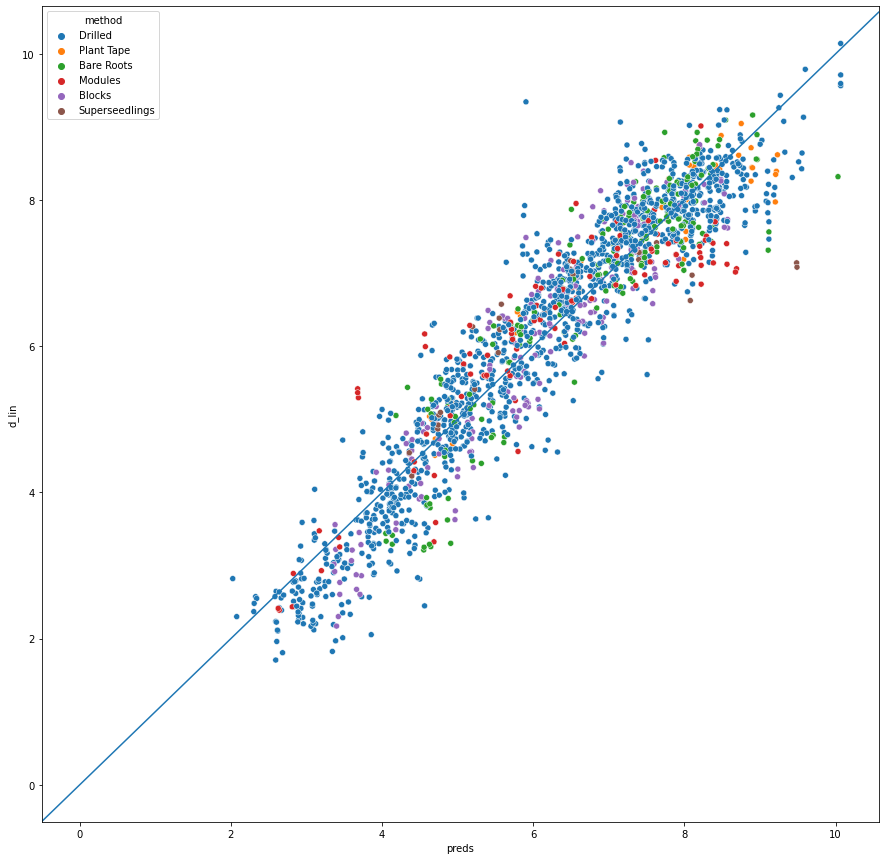

In [25]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()


In [26]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,pp2m2,-0.044897
1,organic_matter,0.461249
2,heat_units,0.757770
3,solar_radiation,1.452342
4,method_Blocks,-0.410453
5,method_Drilled,-1.739872
6,method_Modules,-0.066601
7,method_Plant Tape,-0.255636
8,method_Superseedlings,-0.088787
9,inputs_Conventional,0.267187


In [27]:
X_1 = summary_data_avg.drop(['d_lin',
                             'mean_diameter',
                             'std_dev_diameter',
                             'fieldzonedate',
                             'sample_date',
                             'planting_date',
                             'preds',
                             'sand',
                             'silt',
                             'clay',
                             'fieldzone'], axis = 1)

X_1['growth_units'] = X_1['solar_radiation']*X_1['heat_units']

X_1 = X_1.drop(['heat_units',
                'solar_radiation'], axis = 1)

y_1 = summary_data_avg['mean_diameter']

In [28]:
X_1 = pd.get_dummies(X_1, columns = ['method',
                                     'inputs',
                                     'variety',
                                     'protection'], drop_first = True)

In [29]:
X_1_scaled = scaler.fit_transform(X_1)

reg = LinearRegression().fit(X_1_scaled, y_1)
preds = reg.predict(X_1_scaled)

summary_data_avg['preds'] = preds

reg.score(X_1_scaled, y_1)

0.8265834267007701

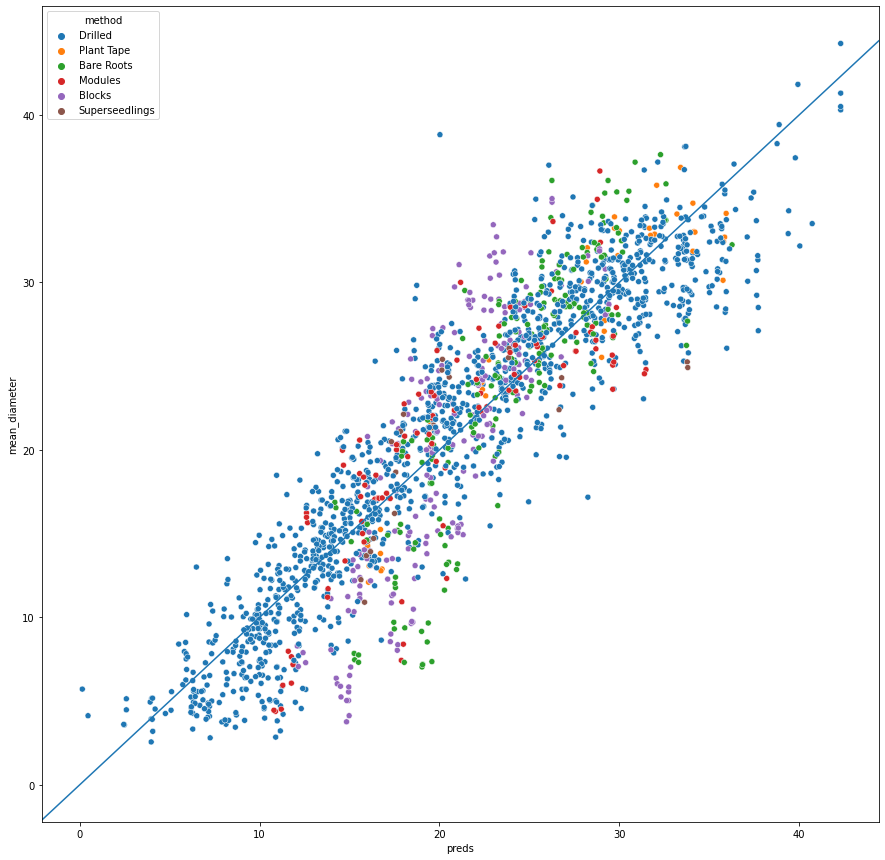

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'mean_diameter', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()

In [31]:
coef_list = list(reg.coef_)
var_list = list(X_1)

reg_coef_df = pd.DataFrame({'variable': var_list, 'coef': coef_list}, columns=['variable', 'coef'])

reg_coef_df

,variable,coef
0,pp2m2,-0.272725
1,organic_matter,2.379607
2,growth_units,9.930332
3,method_Blocks,-2.064079
4,method_Drilled,-7.112876
5,method_Modules,-0.422587
6,method_Plant Tape,-0.887226
7,method_Superseedlings,-0.462769
8,inputs_Conventional,1.537173
9,inputs_Organic,0.723807


In [34]:
def average_count(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    average_count = df['pp2m2'].mean()
    
    return average_count

average_count('Allans 071')

43.0

In [35]:
def max_sample_date(fieldzone):
    
    df = summary_data[summary_data['fieldzone']==fieldzone]
    max_sample_date = df['sample_date'].max()
    
    return max_sample_date

max_sample_date('Allans 071')

Timestamp('2020-01-20 00:00:00')

In [36]:
def max_mean_diameter(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_mean_diameter = df['mean_diameter'].max()
    
    return max_mean_diameter

max_mean_diameter('Allans 071')

38.28333333333334

In [37]:
def max_solar(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_solar = df['solar_radiation'].max()
    
    return max_solar

max_solar('Allans 071')

790242

In [38]:
def max_heat(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_heat = df['heat_units'].max()
    
    return max_heat

max_heat('Allans 071')

2143

In [40]:
field_data['avg_pp2m2'] = 0.0
field_data['max_sample_date'] = 0
field_data['max_mean_diameter'] = 0.0
field_data['max_heat'] = 0.0
field_data['max_solar'] = 0.0
field_data['remaining_heat'] = 0.0
field_data['remaining_solar'] = 0.0

for i in field_data.index:
    
    clear_output(wait=True)
    
    fieldzone = field_data['fieldzone'][i]
    field_data['avg_pp2m2'][i] = average_count(fieldzone)
    field_data['max_sample_date'][i] = max_sample_date(fieldzone)
    field_data['max_mean_diameter'][i] = max_mean_diameter(fieldzone)
    field_data['max_heat'][i] = max_heat(fieldzone)
    field_data['max_solar'][i] = max_solar(fieldzone)
    start = field_data['max_sample_date'][i]
    finish = field_data['est_harvest_date'][i]
    field_data['remaining_heat'][i] = cum_heat_units(start, finish, weather_data_avg)
    field_data['remaining_solar'][i] = cum_solar_radiation(start, finish, weather_data_avg)   
    
    print("Current Progress:", np.round(i/len(field_data)*100,0),"%")

Current Progress: 100.0 %


In [41]:
field_data = field_data.dropna()
field_data

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,fieldzone,avg_pp2m2,max_sample_date,max_mean_diameter,max_heat,max_solar
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,Allans 071,43.750000,2020-01-13 00:00:00,38.283333,2143.0,790242.0
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,Allans 072,42.750000,2020-01-13 00:00:00,39.421053,2143.0,790242.0
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,Allans 073,44.500000,2020-01-13 00:00:00,31.232558,2143.0,790242.0
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,Allans 074,45.750000,2020-01-13 00:00:00,33.446809,2143.0,790242.0
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,Allans 075,44.333333,2020-01-20 00:00:00,31.666667,2150.0,794475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Wissey I (S),3,2020-03-26,Shafton,Drilled,Conventional,Barley,251161,9,65,26,69.5,Wissey I (S)3,46.600000,2020-09-10 00:00:00,30.583333,1584.0,673567.0
426,Wissey I (S),4,2020-03-26,Shafton,Drilled,Conventional,Barley,251161,9,65,26,69.5,Wissey I (S)4,49.000000,2020-09-10 00:00:00,30.155556,1584.0,673567.0
427,Wissey O (S),1,2019-03-26,Shafton,Drilled,Conventional,Barley,244843,11,64,25,71.2,Wissey O (S)1,39.000000,2019-09-19 00:00:00,37.184211,1669.0,697973.0
428,Wissey O (S),2,2019-03-26,Shafton,Drilled,Conventional,Barley,244843,11,64,25,71.2,Wissey O (S)2,41.500000,2019-09-19 00:00:00,33.295455,1669.0,697973.0


In [42]:
def filter_data(method, inputs, variety, protection):
    
    filtered = summary_data_avg[data['variety'].str.contains(variety)]
    filtered = filtered[filtered['inputs'].str.contains(inputs)]
    filtered = filtered[filtered['protection'].str.contains(protection)]
    filtered = filtered[filtered['method'].str.contains(method)]
    
    return filtered

In [43]:
def predict_weather(start, finish, variable):
    
    df = weather_data_avg.loc[(weather_data_avg['date'] > start) & (weather_data_avg['date'] < finish), [variable]]
    pred_hu = df[variable].sum()
    
    return pred_hu

start = datetime(year=2021, month=6, day=2, hour=13, minute=14, second=31)
finish = datetime(year=2022, month=6, day=2, hour=13, minute=14, second=31)

predict_weather(start, finish, 'rain')

538.8357142857142